Simple linear regression is a statistical method used to model and analyze the relationship between two continuous variables: one independent variable (predictor) and one dependent variable (response). The relationship is represented by a linear equation:
𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β
0
​
 +β
1
​
 X+ϵ

Data loading and Preprocessing

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [ ]:
data = pd.read_csv('AirQualityUCI.csv',  sep = ";")

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is of type object (string)
        data[column] = data[column].str.replace(',', '.').astype(float, errors='ignore')

In [ ]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [ ]:
data.drop('Unnamed: 15',axis=1,inplace=True)

In [ ]:
data.drop('Unnamed: 16',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
data= data.dropna()

In [ ]:
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


Removing Outliers

In [ ]:
data = data[data['T'] != -200]

In [ ]:
data = data[data['CO(GT)'] != -200]

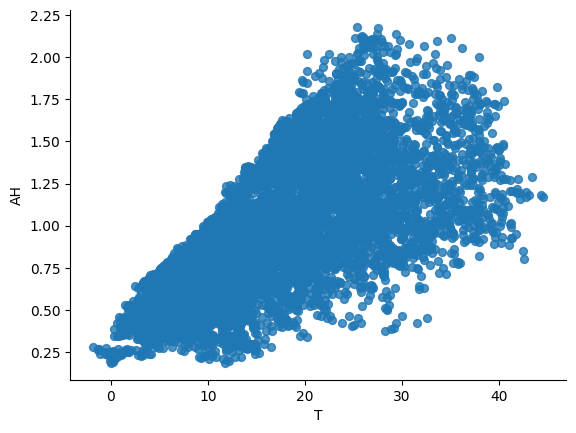

In [ ]:


from matplotlib import pyplot as plt
data.plot(kind='scatter', x='T', y='AH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

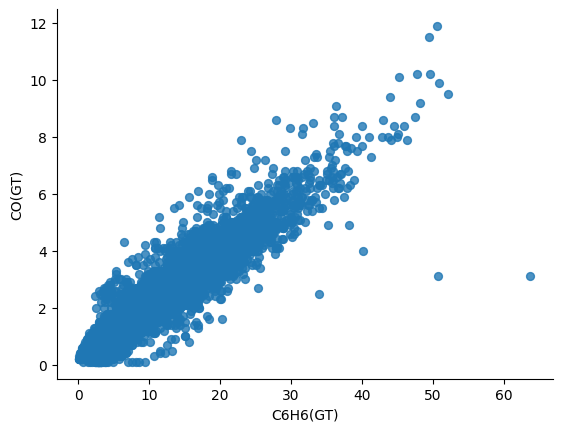

In [ ]:

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='C6H6(GT)', y='CO(GT)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.tail(20)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9336,03/04/2005,18.00.00,1.2,1015.0,-200.0,4.6,743.0,190.0,851.0,138.0,981.0,597.0,22.8,21.7,0.5945
9337,03/04/2005,19.00.00,2.7,1248.0,-200.0,11.1,1018.0,367.0,599.0,181.0,1289.0,1167.0,19.9,33.0,0.7608
9338,03/04/2005,20.00.00,2.5,1180.0,-200.0,7.9,894.0,355.0,636.0,187.0,1200.0,1372.0,17.5,40.7,0.8073
9339,03/04/2005,21.00.00,1.5,1102.0,-200.0,6.0,812.0,235.0,693.0,158.0,1178.0,1042.0,16.4,46.6,0.8642
9340,03/04/2005,22.00.00,1.6,1116.0,-200.0,5.8,803.0,233.0,696.0,153.0,1173.0,1055.0,15.5,49.0,0.8579
9341,03/04/2005,23.00.00,1.2,1100.0,-200.0,5.1,769.0,170.0,722.0,128.0,1147.0,1049.0,14.3,52.5,0.8497
9342,04/04/2005,00.00.00,0.9,1012.0,-200.0,3.5,683.0,117.0,801.0,93.0,1073.0,816.0,14.2,51.4,0.8275
9343,04/04/2005,01.00.00,0.6,944.0,-200.0,1.9,579.0,70.0,925.0,58.0,1002.0,598.0,13.8,51.2,0.8058
9344,04/04/2005,02.00.00,0.5,912.0,-200.0,1.5,544.0,69.0,959.0,55.0,1002.0,573.0,12.1,56.3,0.7927
9345,04/04/2005,03.00.00,0.4,887.0,-200.0,1.1,508.0,62.0,1047.0,51.0,974.0,549.0,11.3,58.9,0.7888


Linear simple regression model

In [ ]:
X = data[['C6H6(GT)']]
y = data['CO(GT)']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)


print(f'Training RMSE: {train_rmse:.2f}')
print(f'Testing RMSE: {test_rmse:.2f}')
print(f'Training R^2: {train_r2:.2f}')
print(f'Testing R^2: {test_r2:.2f}')

Training RMSE: 0.53
Testing RMSE: 0.50
Training R^2: 0.87
Testing R^2: 0.87


RMSE(Root mean squared error) is a measure of the differences between the predicted values by a model and the actual values. A lower RMSE indicates a better fit of the model to the data.

Higher R² values indicate a better fit of the model to the data. R², or the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

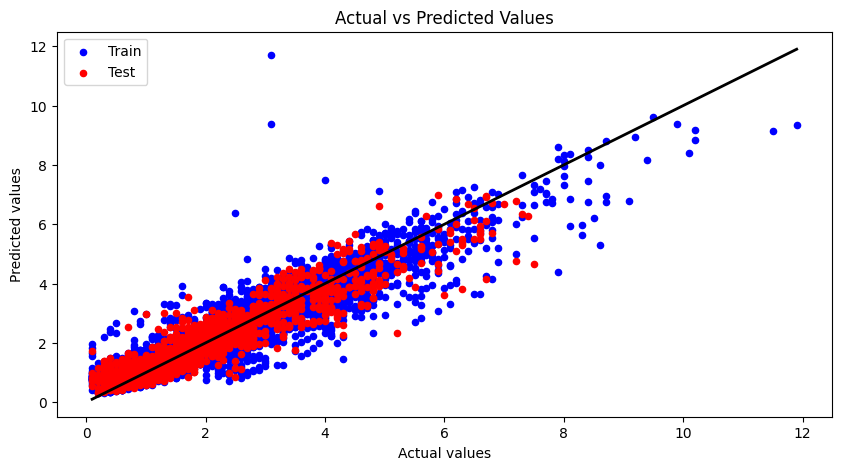

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_train, color='blue', s=20, label='Train')
plt.scatter(y_test, y_pred_test, color='red', s=20, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
# Assuming 'model' is your trained linear regression model

# Define the input for prediction
new_input = [[10.1]]  # For example, if your input feature is 'C6H6(GT)', provide a value for it

# Make prediction
prediction = model.predict(new_input)

# Print the prediction
print(f"Prediction for the input {new_input}: {prediction}")


Prediction for the input [[10.1]]: [2.09817094]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
